## Data Preprocessing 01

In [173]:
import numpy as np
import pandas as pd

In [174]:
data = pd.read_csv("used_cars.csv")

In [172]:
data.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [104]:
data.shape

(10000, 12)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [106]:
cont_cols = ["make_year", "mileage_kmpl", "engine_cc", "owner_count", "accidents_reported","price_usd"]
cat_cols = ["brand","fuel_type","transmission","color","service_history","insurance_valid"]


### Missing Values 

In [107]:
data.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [108]:
data['service_history'].value_counts()

service_history
Full       4987
Partial    2975
Name: count, dtype: int64

In [109]:
data['service_history'] = data['service_history'].fillna(data['service_history'].mode()[0])

In [110]:
data.isnull().sum()

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

### Outliers 

In [111]:
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outlier_mask.sum() 

outlier_count = count_outliers(data, cont_cols)
print("Outlier count :\n", outlier_count)


Outlier count :
 make_year               0
mileage_kmpl           36
engine_cc               0
owner_count             0
accidents_reported    130
price_usd              58
dtype: int64


In [112]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

filtered_cols = [col for col in cont_cols if col != 'price_usd']
data = remove_outliers(data, filtered_cols)
print("Data shape after removing outliers:", data.shape)


Data shape after removing outliers: (9834, 12)


## EDA

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


### Summary

In [114]:
cont_cols = ["make_year", "mileage_kmpl", "engine_cc", "owner_count", "accidents_reported","price_usd"]
cat_cols = ["brand","fuel_type","transmission","color","service_history","insurance_valid"]


In [115]:
data.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000,9834.000000
mean,2009.204190,17.912559,2288.712630,3.006406,7176.822727,0.458511
std,8.366333,4.957868,1292.214642,1.417539,2795.009595,0.629746
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.520000,1200.000000,2.000000,5171.892500,0.000000
50%,2009.000000,17.960000,1800.000000,3.000000,6958.950000,0.000000
75%,2016.000000,21.330000,3000.000000,4.000000,8990.472500,1.000000
max,2023.000000,31.570000,5000.000000,5.000000,17647.630000,2.000000


In [116]:
for col in cat_cols:
    print(f"\n{col}: {data[col].unique()}")


brand: ['Chevrolet' 'Honda' 'BMW' 'Hyundai' 'Nissan' 'Tesla' 'Toyota' 'Kia'
 'Volkswagen' 'Ford']

fuel_type: ['Petrol' 'Diesel' 'Electric']

transmission: ['Manual' 'Automatic']

color: ['White' 'Black' 'Blue' 'Red' 'Gray' 'Silver']

service_history: ['Full' 'Partial']

insurance_valid: ['No' 'Yes']


### Univariate Analysis

In [117]:
hist_col = ["price_usd","make_year", "mileage_kmpl"]

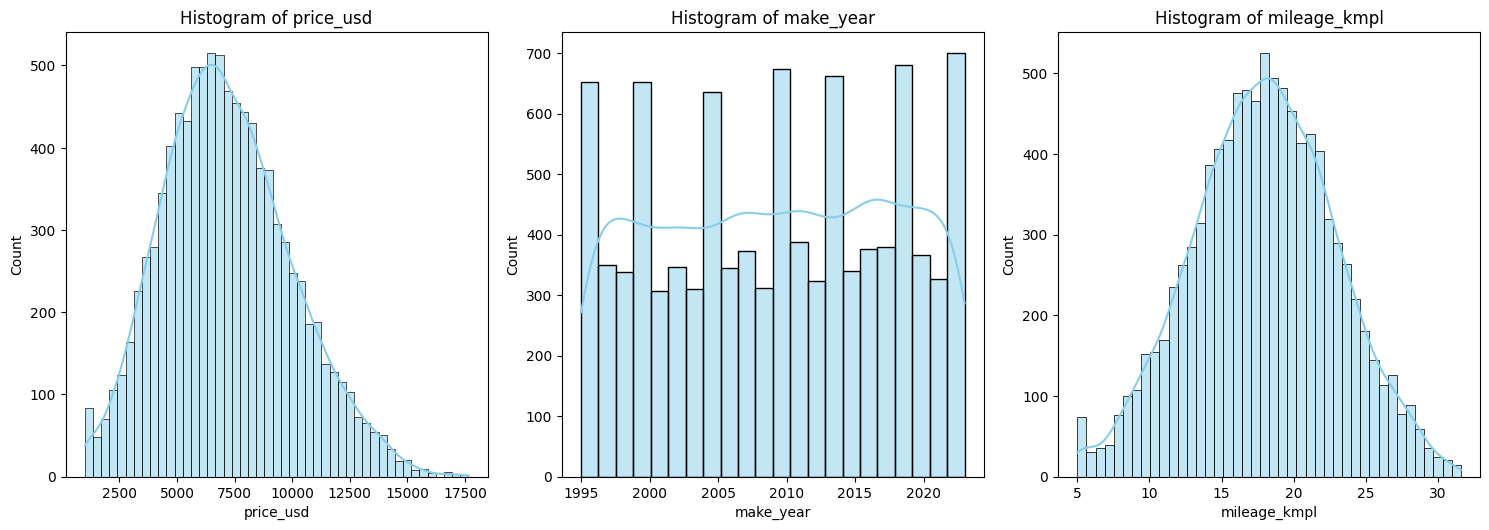

In [118]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(hist_col):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


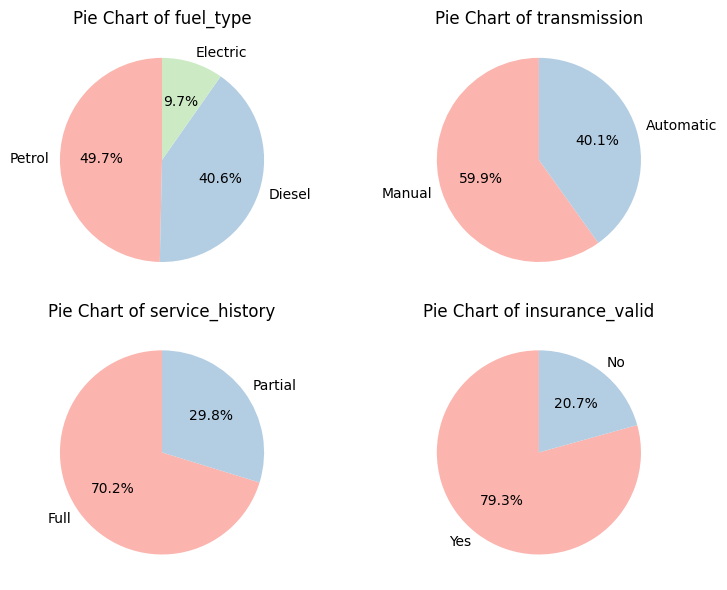

In [160]:
pie_cols = ['fuel_type', 'transmission', 'service_history', 'insurance_valid']
plt.figure(figsize=(8, 6))
for i, col in enumerate(pie_cols):
    plt.subplot(2, 2, i + 1)
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  
plt.tight_layout()
plt.show()

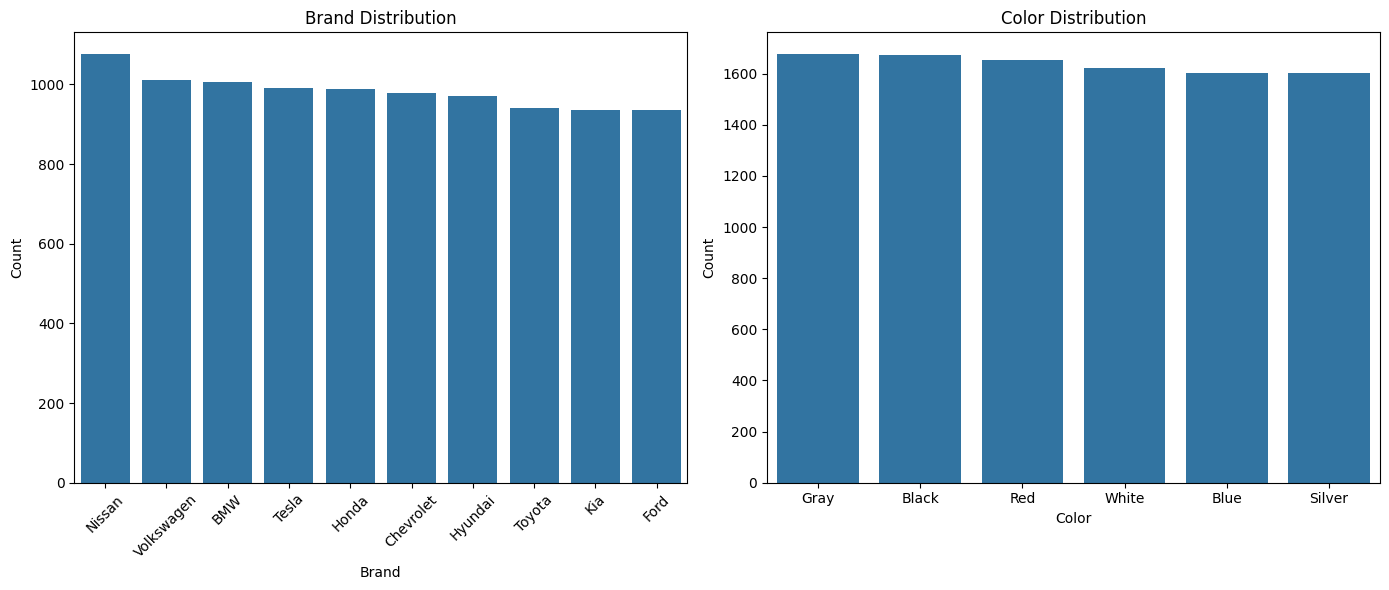

In [120]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='brand', data=data, order=data['brand'].value_counts().index)
plt.title('Brand Distribution')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='color', data=data, order=data['color'].value_counts().index)
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Bivariate Analysis

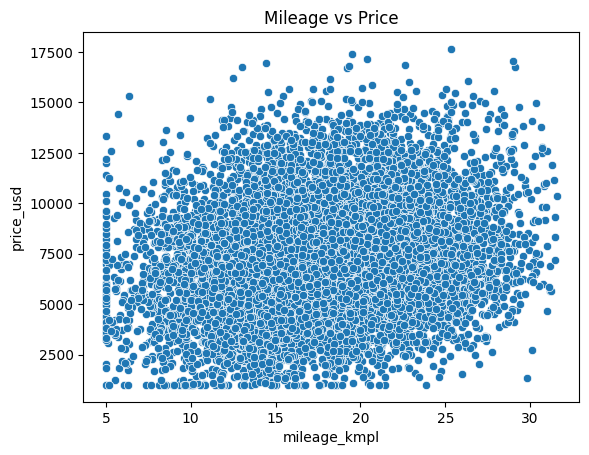

In [121]:
sns.scatterplot(data=data, x='mileage_kmpl', y='price_usd')
plt.title('Mileage vs Price')
plt.show()


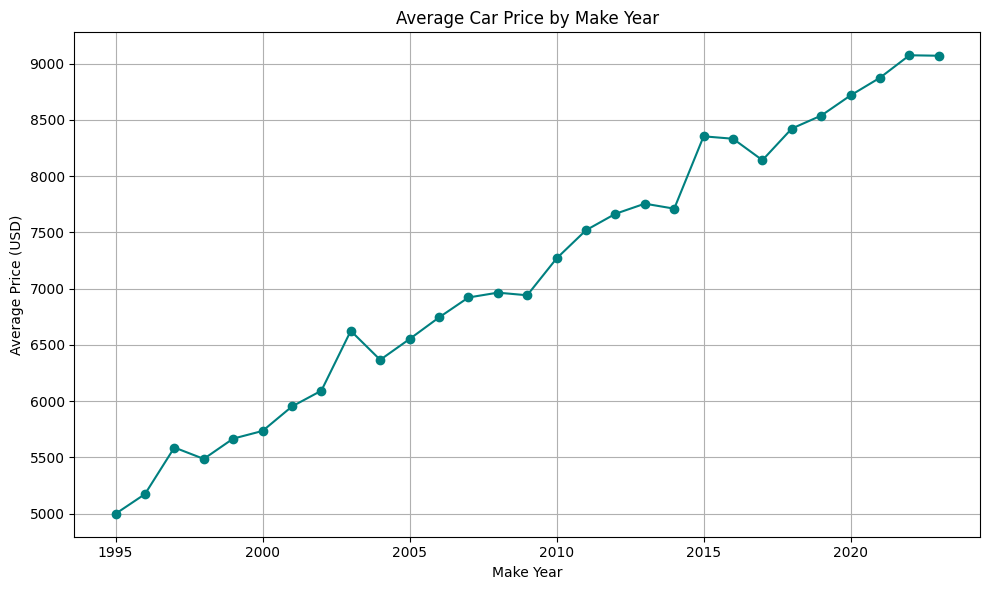

In [122]:
avg_price_by_year = data.groupby('make_year')['price_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year['make_year'], avg_price_by_year['price_usd'], marker='o', color='teal')
plt.title('Average Car Price by Make Year')
plt.xlabel('Make Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

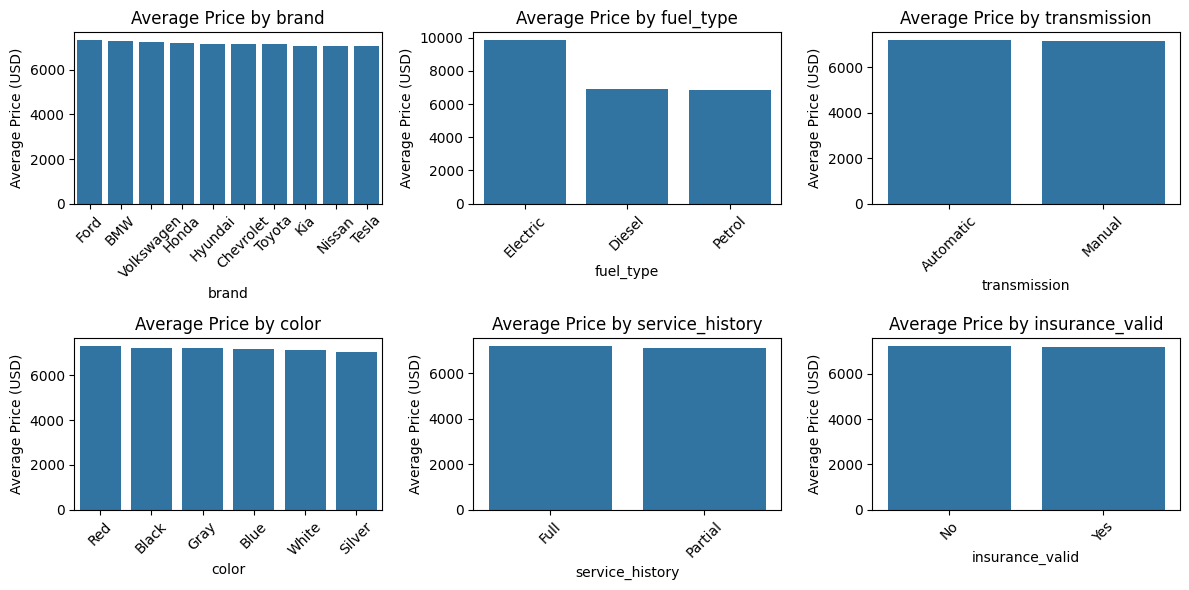

In [166]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    
    # Step 1: Group and sort by average price
    avg_prices = data.groupby(col)['price_usd'].mean().sort_values(ascending=False)
    
    # Step 2: Use sorted index to preserve order in plot
    sns.barplot(x=avg_prices.index, y=avg_prices.values)
    
    plt.title(f'Average Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Price (USD)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Correlation Analysis

In [124]:
correlation = data[cont_cols].corr()['price_usd'].sort_values(ascending=False)
print(correlation)

price_usd             1.000000
engine_cc             0.678038
make_year             0.434623
mileage_kmpl          0.207188
accidents_reported    0.004084
owner_count          -0.262345
Name: price_usd, dtype: float64


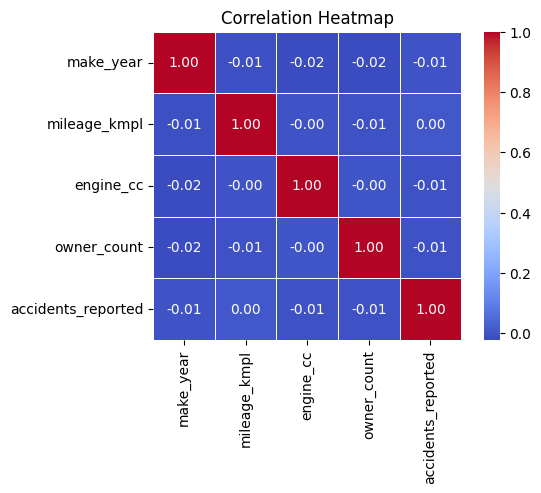

In [179]:
filtered_cols = [col for col in cont_cols if col != 'price_usd']
corr = data[filtered_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing 02

In [126]:
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)


In [127]:
data_encoded.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hyundai,...,fuel_type_Electric,fuel_type_Petrol,transmission_Manual,color_Blue,color_Gray,color_Red,color_Silver,color_White,service_history_Partial,insurance_valid_Yes
0,2001,8.17,4000,4,8587.64,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,2014,17.59,1500,4,5943.50,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
2,2023,18.09,2500,5,9273.58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2009,11.28,800,1,6836.24,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,1
4,2005,12.23,1000,2,4625.79,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [128]:
X = data_encoded.drop(["price_usd", "accidents_reported"], axis=1)
y = data_encoded["price_usd"]

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [130]:
X_train.shape, X_test.shape

((7375, 23), (2459, 23))

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_acc(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'{model} --> R²: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')


In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

from sklearn.svm import SVR
svr = SVR()
model_acc(svr)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
model_acc(knn)



LinearRegression() --> R²: 0.8714, MAE: 794.7388, MSE: 988210.0039
RandomForestRegressor() --> R²: 0.8489, MAE: 861.8206, MSE: 1160766.5510
SVR() --> R²: 0.2331, MAE: 1929.5999, MSE: 5892759.8284
KNeighborsRegressor() --> R²: 0.7193, MAE: 1121.5406, MSE: 2157039.9329



 Model Comparison:
                      Model  R_squared          MAE           MSE         RMSE
0         Linear Regression   0.871386   794.738774  9.882100e+05   994.087523
1             Random Forest   0.849742   857.931328  1.154511e+06  1074.481623
3            k-NN Regressor   0.719264  1121.540556  2.157040e+06  1468.686465
2  Support Vector Regressor   0.233065  1929.599926  5.892760e+06  2427.500737


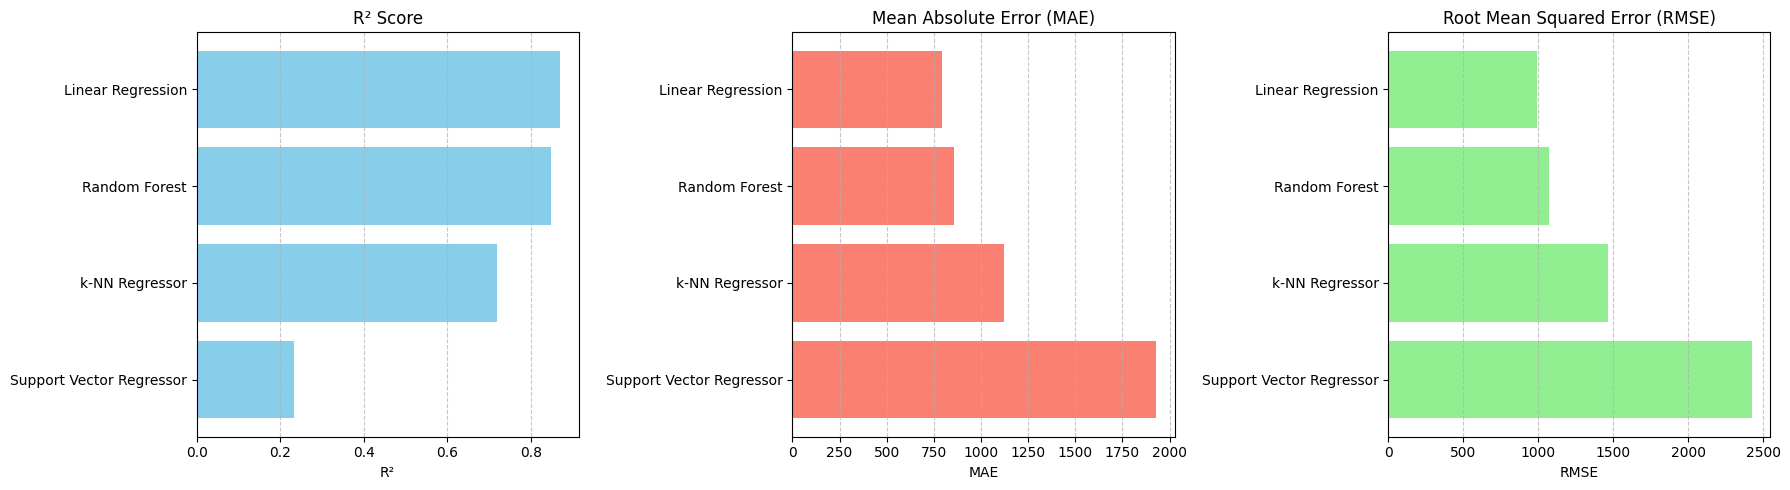

In [177]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "k-NN Regressor": KNeighborsRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append((name, r2, mae, mse, rmse))

df_results = pd.DataFrame(results, columns=["Model", "R_squared", "MAE", "MSE", "RMSE"])
df_results = df_results.sort_values(by="R_squared", ascending=False)

print("\n Model Comparison:")
print(df_results)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].barh(df_results["Model"], df_results["R_squared"], color='skyblue')
axs[0].set_title("R² Score")
axs[0].set_xlabel("R²")
axs[0].invert_yaxis()
axs[0].grid(axis='x', linestyle='--', alpha=0.7)

axs[1].barh(df_results["Model"], df_results["MAE"], color='salmon')
axs[1].set_title("Mean Absolute Error (MAE)")
axs[1].set_xlabel("MAE")
axs[1].invert_yaxis()
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

axs[2].barh(df_results["Model"], df_results["RMSE"], color='lightgreen')
axs[2].set_title("Root Mean Squared Error (RMSE)")
axs[2].set_xlabel("RMSE")
axs[2].invert_yaxis()
axs[2].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Feature Selection

In [133]:
import statsmodels.api as sm


In [134]:
def forward_selection_p(X, y, threshold_in=0.05):
    included = [] 
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pvals[new_column] = model.pvalues[new_column]

        best_pval = new_pvals.min()
        if best_pval < threshold_in:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True
            print(f'Add {best_feature:23} with p-value {best_pval:.6f}')
        
        if not changed:
            break

    return included

In [135]:
selected_features1 = forward_selection_p(X_train, y_train)
print("\n✅ Final selected features:", selected_features1)


Add engine_cc               with p-value 0.000000
Add make_year               with p-value 0.000000
Add owner_count             with p-value 0.000000
Add fuel_type_Electric      with p-value 0.000000
Add mileage_kmpl            with p-value 0.000000
Add brand_Tesla             with p-value 0.006501

✅ Final selected features: ['engine_cc', 'make_year', 'owner_count', 'fuel_type_Electric', 'mileage_kmpl', 'brand_Tesla']


In [178]:
X_train_selected = X_train[selected_features1]
X_test_selected = X_test[selected_features1]

lr2 = LinearRegression()
lr2.fit(X_train_selected, y_train)

y_pred = lr2.predict(X_test_selected)

test_r2 = lr2.score(X_test_selected, y_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"R² on test set: {test_r2:.6f}")
print(f"MAE on test set: {test_mae:.6f}")
print(f"MSE on test set: {test_mse:.6f}")

R² on test set: 0.871626
MAE on test set: 794.360928
MSE on test set: 986367.327617


In [147]:
print("Intercept:", lr2.intercept_)
for feature, coef in zip(X_train_selected.columns, selected_model.coef_):
    print(f"{feature}: {coef}")

Intercept: -297152.97832445597
engine_cc: 1.4991040910627984
make_year: 149.27937389845027
owner_count: -499.5552112933699
fuel_type_Electric: 2989.676987178089
mileage_kmpl: 122.3757778370092
brand_Tesla: -105.3449360897975


## Hyperparameter tuning

### Model 01

In [148]:
print(lr.get_params())
print(lr2.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [149]:
from sklearn.model_selection import GridSearchCV
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}


In [154]:
grid_obj = GridSearchCV(estimator = lr, param_grid = param_space)
grid_fit = grid_obj.fit(X_train, y_train)
par_lr = grid_fit.best_estimator_
par_lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,1
,positive,False


In [155]:
best_model.score(X_test, y_test)

0.8713857268129606

### Model 02

In [156]:
grid_obj = GridSearchCV(estimator = lr2, param_grid = param_space)
grid_fit = grid_obj.fit(X_train_selected, y_train)
par_lr2 = grid_fit.best_estimator_
par_lr2

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,1
,positive,False


In [158]:
par_lr2.score(X_test_selected, y_test)

0.8716255487811768